<h1><center>Mineração Estatística de Dados</center></h1>
<h2><center>Projeto 1: Pré-processamento de dados e classificação</center></h2>
<br>
<br>
<br>


<h2><center>Bruno Gomes Coelho - 9791160</center></h2>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Motivação

Iremos desenvolver nesse projeto o pipeline de ciência de dados e aprendizado de máquina considerando os dados disponíveis [aqui](https://www.kaggle.com/fschwartzer/tmd-dataset-5-seconds-sliding-window). Algumas das etapas consideras:

- Pré processamento
- EDA
- Algoritmos básicos
- Algotimos com otimização e variação de parâmetros


# Imports e ler os dados

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.preprocessing import minmax_scale, scale, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

from scipy.stats import multivariate_normal

In [2]:
FILE = "data/dataset_5secondWindow%5B1%5D.csv"
df = pd.read_csv(FILE)
df.shape

(5893, 14)

In [3]:
df.head()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389,Car


Temos uma ideia de como estão nossos dados, possuindo 5983 linhas e 14 colunas.


- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Pré-processamento

## Verificar NaN

In [4]:
df.isna().sum()

time                                 0
android.sensor.accelerometer#mean    0
android.sensor.accelerometer#min     0
android.sensor.accelerometer#max     0
android.sensor.accelerometer#std     0
android.sensor.gyroscope#mean        0
android.sensor.gyroscope#min         0
android.sensor.gyroscope#max         0
android.sensor.gyroscope#std         0
sound#mean                           0
sound#min                            0
sound#max                            0
sound#std                            0
target                               0
dtype: int64

Sem NaN nos nosso dados, logo não precisamos lidar com eles.

## Verificar propriedades básicas

In [5]:
df.describe()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std
count,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000
mean,117.731716,10.007976,8.426262,12.247691,0.982987,0.274351,0.078560,0.645235,0.166669,65.445964,65.218848,65.672381,1.318661
std,126.474151,0.655949,1.783007,5.178436,1.505615,0.529583,0.195519,1.293279,0.327209,32.136026,32.129213,32.180745,2.871450
min,3.000000,7.369055,0.337166,8.801019,0.001286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,9.737143,7.805295,10.015566,0.078055,0.007377,0.002044,0.014884,0.003247,58.402467,57.741088,58.879778,0.000000
50%,70.000000,9.850143,9.123124,10.602081,0.369163,0.035267,0.008777,0.078057,0.019004,79.475484,79.086780,79.862550,0.037179
75%,152.000000,10.078998,9.691731,12.291575,1.058376,0.205268,0.054033,0.532054,0.135955,89.722940,89.720104,89.726909,1.487859
max,682.000000,17.427391,12.115013,66.886376,12.879851,5.662153,3.232744,28.860752,4.980892,90.308734,90.308734,90.308734,26.835546


## Valores duplicados

In [6]:
# Considerando a coluna tempo
df.duplicated().sum()

0

In [7]:
# Sem considerar a coluna tempo
df.duplicated(subset=df.columns.values[1:]).sum()

31

Então não temos dados duplicados se considerarmos todas as colunas;

Se desconsideramos a coluna "time", temos 31 linhas duplicadas.

Vamos considerar que "time" com o horário de aquisição, sendo dessa forma uma possível variável útil para o problema (isto é, dependendo do horário do dia, nossa intuição humana nos diz que isso deve influenciar qual meio de transporte a pessoa está usando).

## Tipo dos dados

In [8]:
df.dtypes

time                                 float64
android.sensor.accelerometer#mean    float64
android.sensor.accelerometer#min     float64
android.sensor.accelerometer#max     float64
android.sensor.accelerometer#std     float64
android.sensor.gyroscope#mean        float64
android.sensor.gyroscope#min         float64
android.sensor.gyroscope#max         float64
android.sensor.gyroscope#std         float64
sound#mean                           float64
sound#min                            float64
sound#max                            float64
sound#std                            float64
target                                object
dtype: object

Todas as colunas são numéricas, com exceção do nosso target:

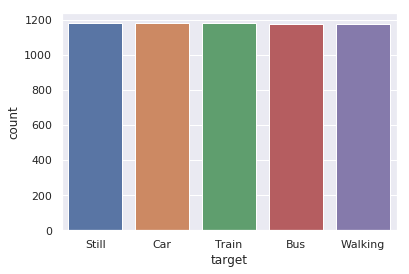

In [9]:
sns.countplot(df["target"])

Percebemos que temos 5 categorias possíveis, todas bem balanceadas entre si.

Isso facilita nossa modelagem, pois não temos que tratar nenhum tipo de desbalanceamento para os modelos.

- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## EDA

### Distribuição de cada feature, considerando cada uma das categorias individualmente

/home/bcoelho/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


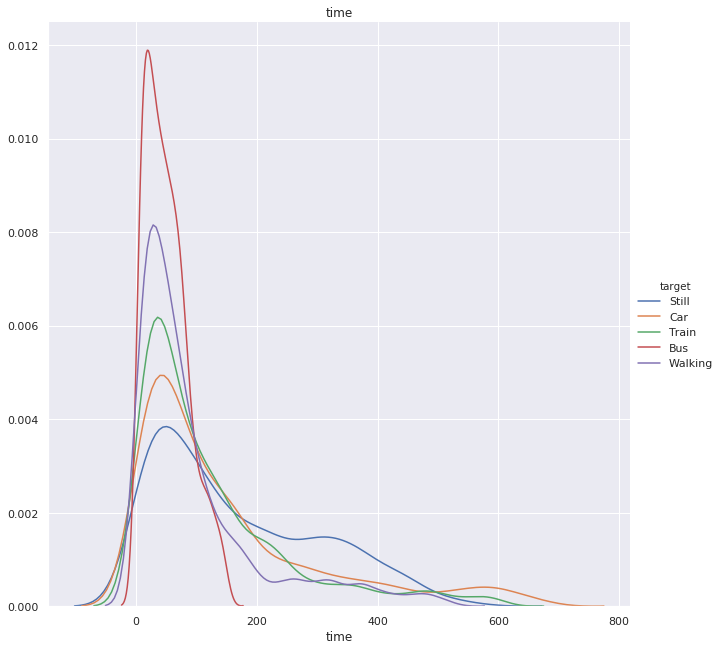

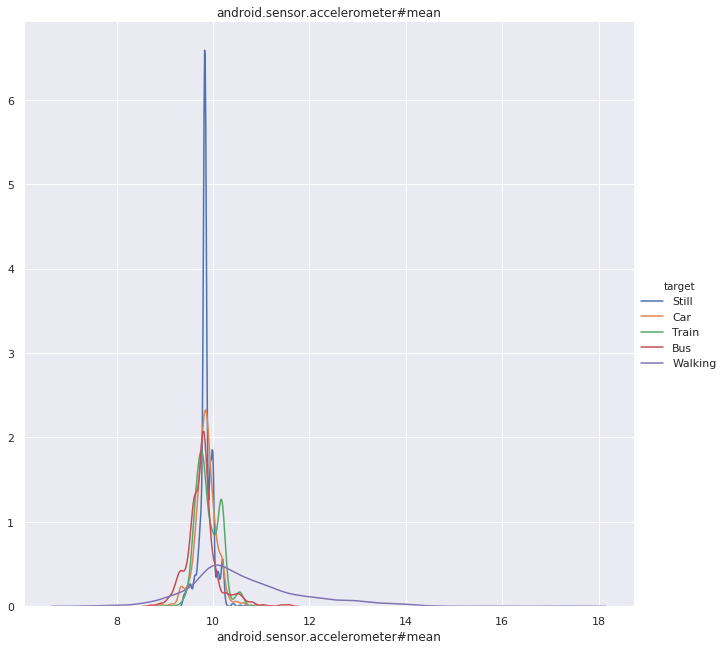

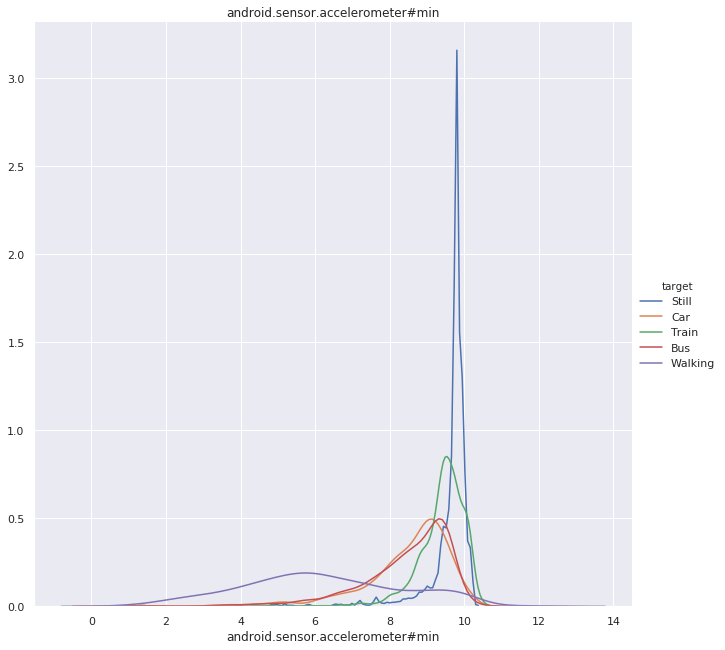

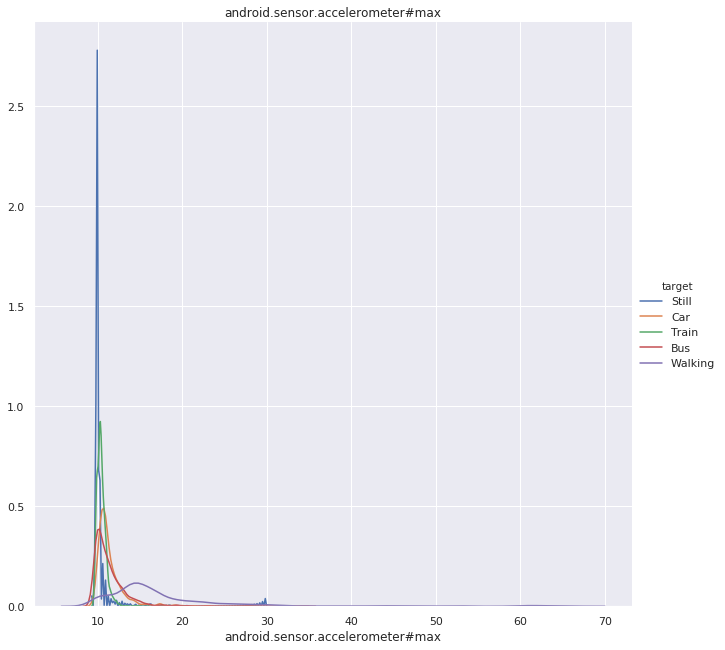

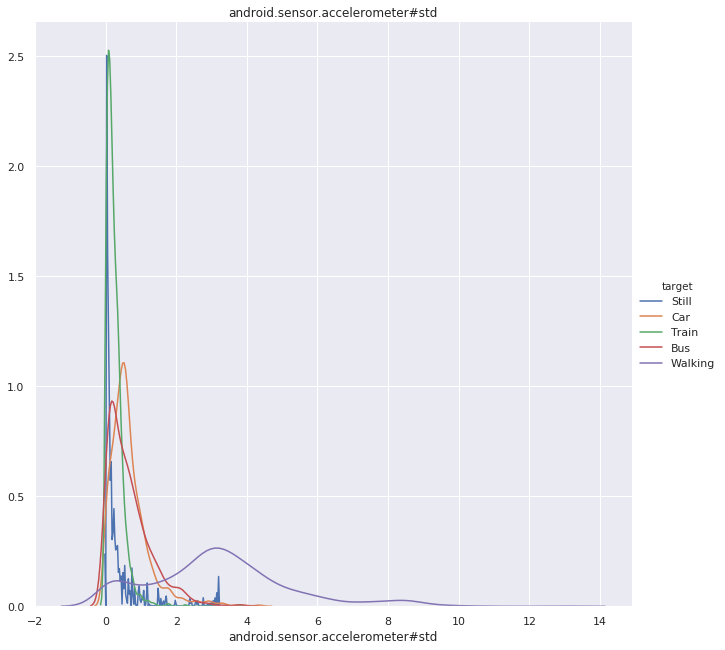

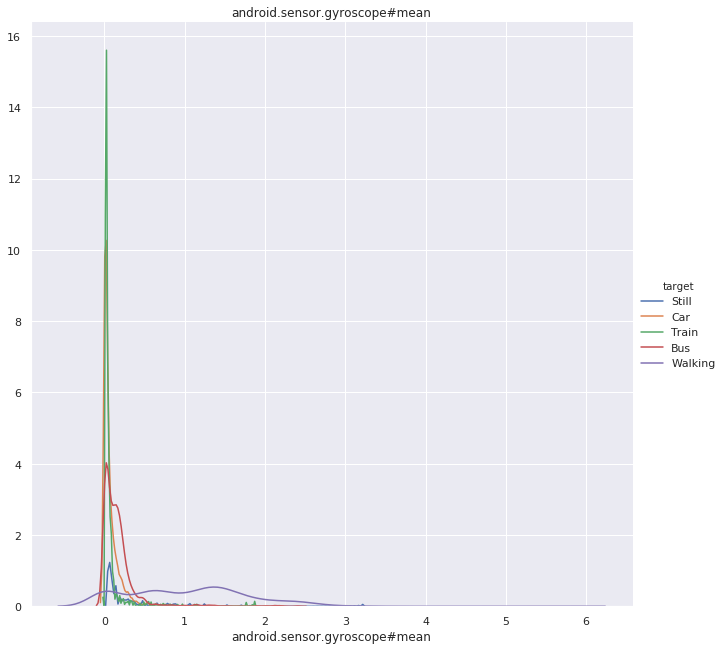

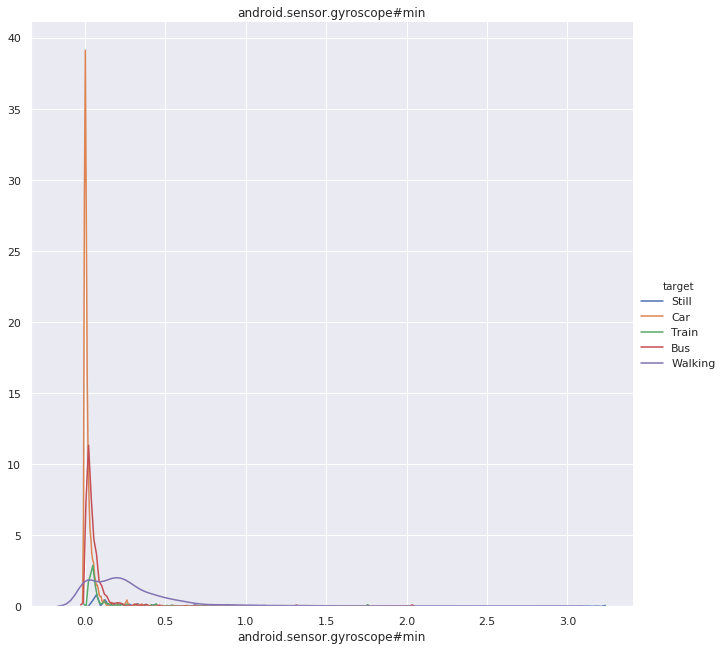

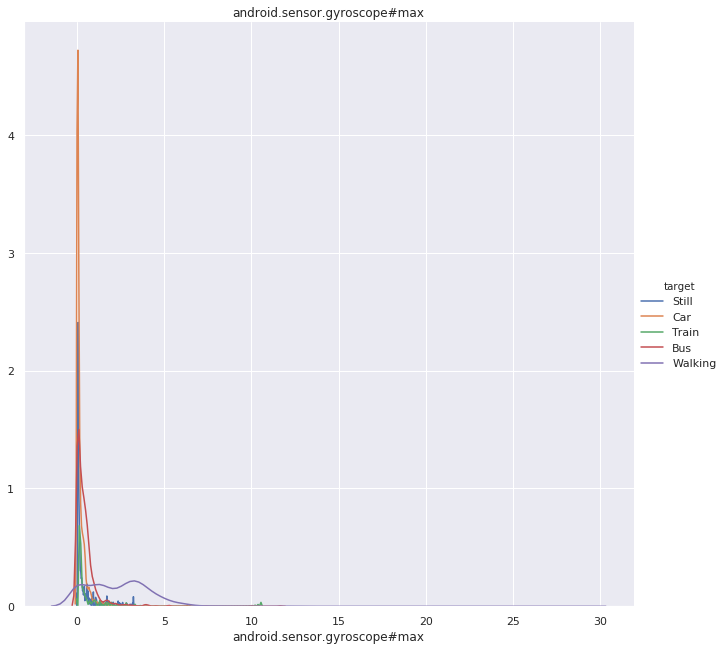

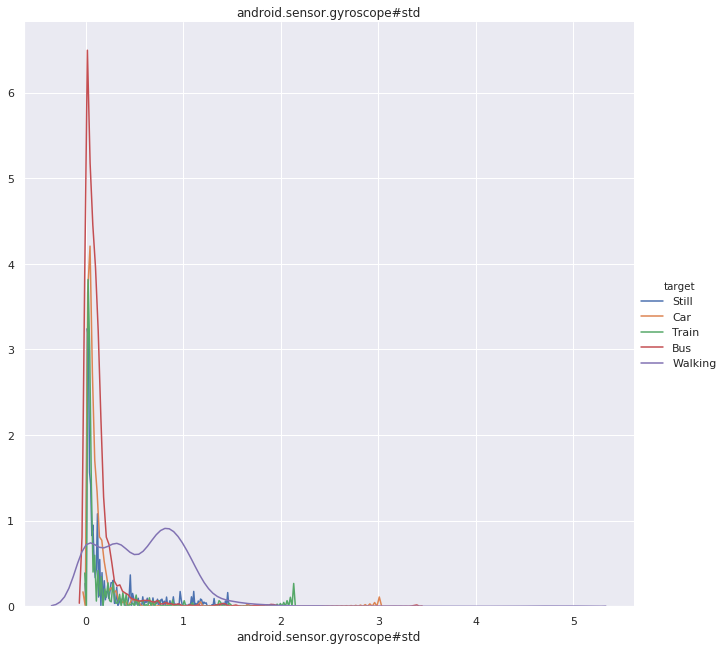

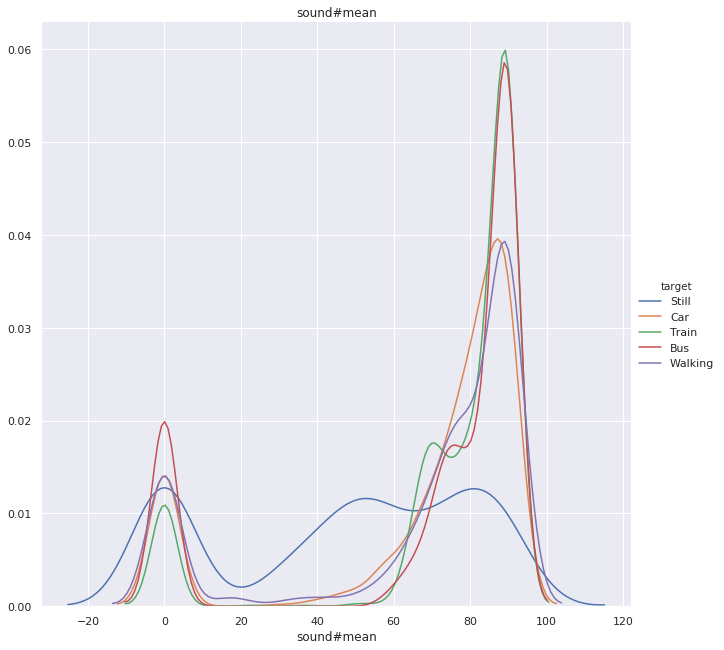

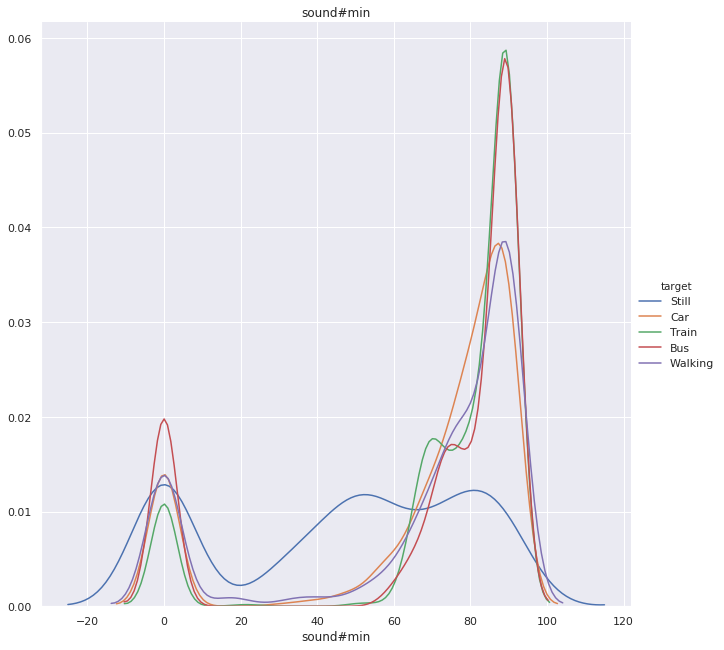

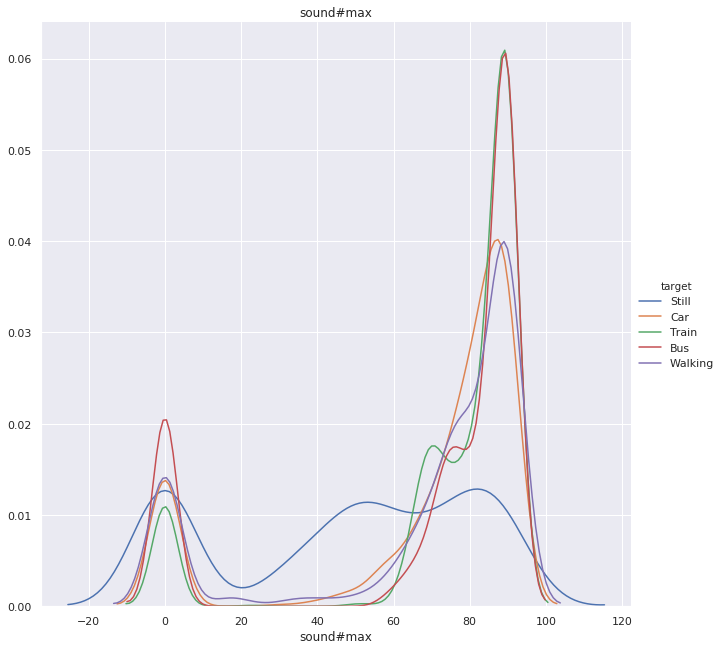

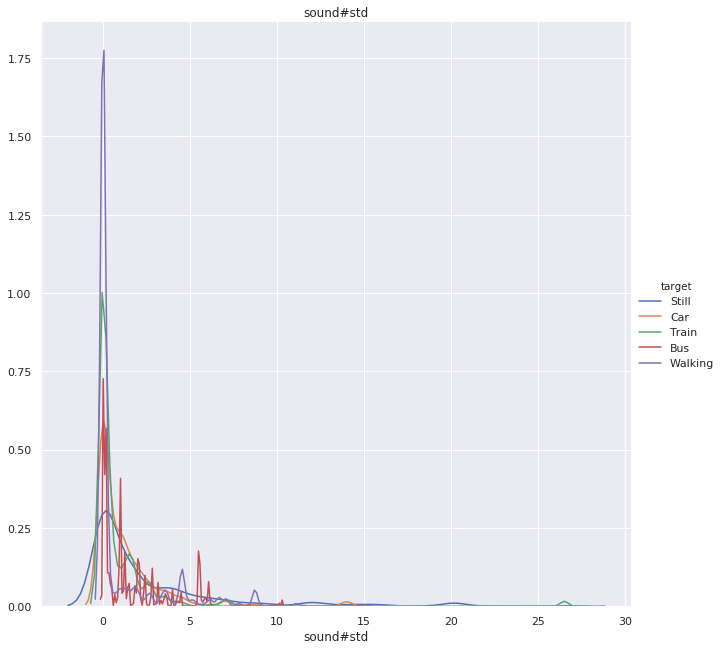

In [10]:
# Plote a distribuição de todas as colunas menos nosso target
for col in df.columns[:-1]:
    g = sns.FacetGrid(df, hue="target", height=9, hue_order=df["target"].unique())
    g.map(sns.distplot, col, hist=False).add_legend()
    plt.title(col)
    plt.show()
    

Com isso percebemos que algumas colunas como sound#min / sound#max/ sound#mean tem um comportamento extramamente semelhante, mesmo considerando as diferentes classses.

Vamos ver quantos por centos são iguais:

In [11]:
def equal_cols(df, col1, col2):
    amount = ((df["sound#min"] == df["sound#mean"]).sum() * 100) / len(df)
    print(f"Cols {col1} and {col2} are equal {amount} % of times")

equal_cols(df, "sound#min", "sound#max")
equal_cols(df, "sound#min", "sound#mean")
equal_cols(df, "sound#max", "sound#mean")

Cols sound#min and sound#max are equal 87.3409129475649 % of times
Cols sound#min and sound#mean are equal 87.3409129475649 % of times
Cols sound#max and sound#mean are equal 87.3409129475649 % of times


Logo essas 3 colunas possuem o mesmo valor 87% das vezes - isso já nos indica que devem possuir uma correlação extramamente alta e possivelmente a retirada de 1 ou 2 das 3 deve não impactar tanto nosso modelo.


### Verificação de outliers e distribuição

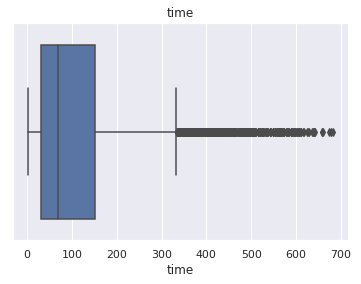

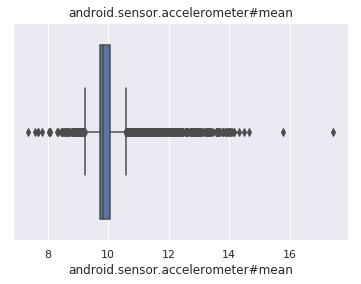

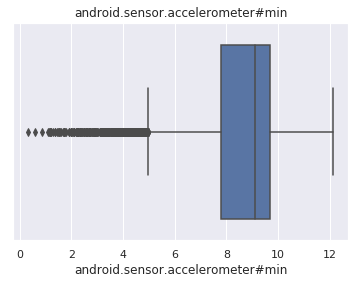

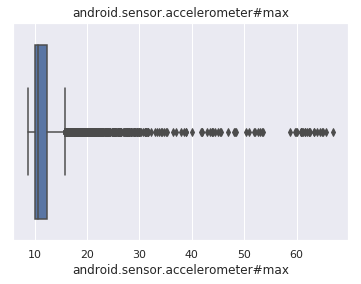

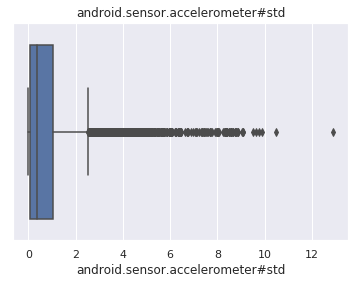

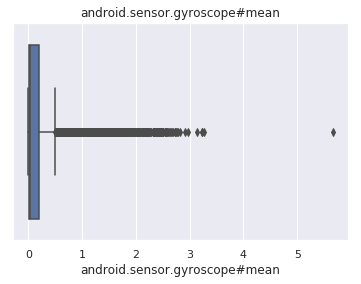

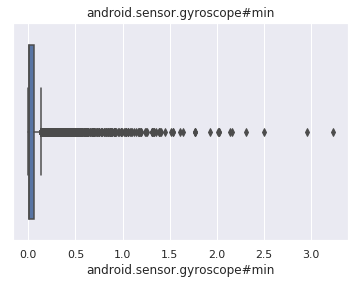

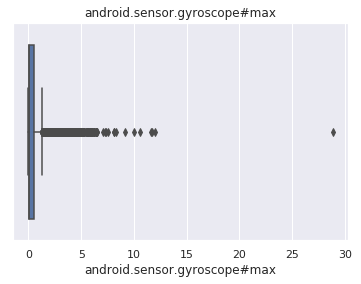

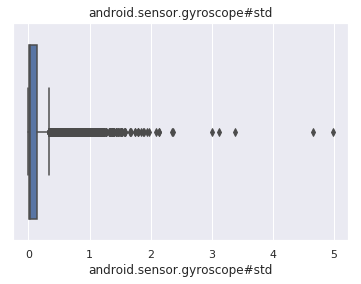

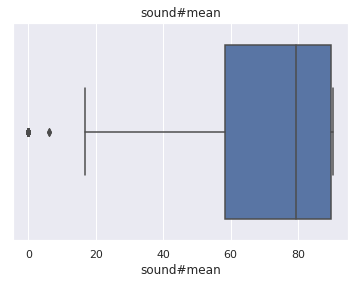

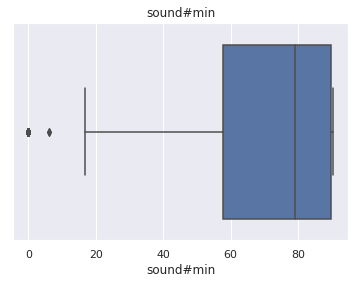

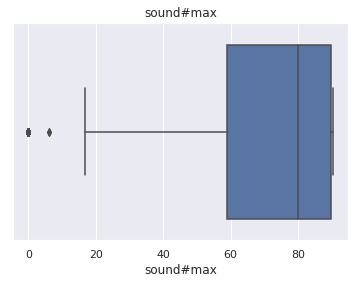

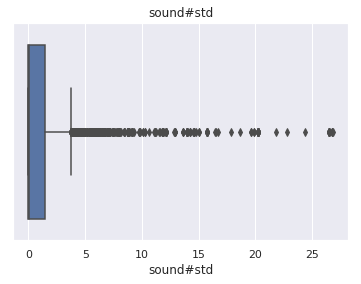

In [12]:
# Plote a distribuição de todas as colunas menos nosso target
for col in df.columns[:-1]:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()
    

Percebemos que considerando 1.5 vezes o IQR, teríamos uma alta quantidade de outliers nas nossas featues

- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# No caso do classificador Knn, verifique o efeito do parâmetro k na classificação.

Vamos realizar um grid search, considerando cross validation de 5 folds.

Verificamos os valores de K, para K = 1, 3, 5, 7, 9, 11, 13

**OBS**: Vamos para todo o projeto considear a acurácia média como métrica de avaliação.

In [13]:
param_grid = {
    "n_neighbors": [x for x in range(1, 14, 1)]
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, 
                           scoring="accuracy", n_jobs=-1, cv=5, verbose=1, 
                           return_train_score=False)

In [14]:
grid_search.fit(df.drop(columns=["target"]), df["target"])

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=1)

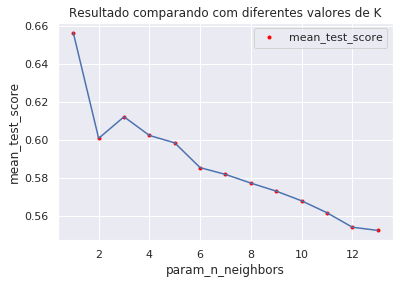

In [15]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values("rank_test_score", inplace=True)

plt.plot(results["param_n_neighbors"], results["mean_test_score"], ".", color="red")
sns.lineplot(x="param_n_neighbors", y="mean_test_score", data=results)
plt.title("Resultado comparando com diferentes valores de K");

In [16]:
grid_search.best_score_, grid_search.best_params_

(0.6563719667402003, {'n_neighbors': 1})

Podemos observar que o melhor resultado foi para K = 1, isto é, considerando apenas 1 vizinhos mais próximo

Percebemos que em geral, conforme aumentamos a quantidade de vizinhos considerados, temos uma queda em acurácia.

- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Compare os classificadores:
- knn(melhor k observado no item anterior - K = 1)
- Naive Bayes
- Decisão Bayesiana

**OBS**: Estamos considerando o Naive Bayes [Gaussiano](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

**OBS**: Continuamos usando 5 folds.

Vamos primeiro criar uma classe para o classificador de decisão baysiana, baseada na API .fit .predict do Sklearn

In [18]:
class BayesianDecision:
    def __init__(self):
        pass
    
    def fit(self, train_x, train_y):
        if type(train_x) != np.ndarray:
            self.train_x = train_x.values
        else:
            self.train_x = train_x
            
        if type(train_y) != np.ndarray:
            self.train_y = train_y.values
        else:
            self.train_y = train_y
        
    def get_params(self, **kwargs):
        return {}
        
    def predict(self, test_x):
        if type(test_x) != np.ndarray:
            test_x = test_x.values
            
        classes = np.unique(self.train_y)
        train_x = self.train_x
        train_y = self.train_y
        P = pd.DataFrame(data=np.zeros((test_x.shape[0], len(classes))), columns=classes)
        
        for i in np.arange(0, len(classes)):
            elements = tuple(np.where(train_y == classes[i]))
            Z = train_x[elements,:][0]
            m = np.mean(Z, axis = 0)
            cv = np.cov(np.transpose(Z))
            for j in np.arange(0,test_x.shape[0]):
                x = test_x[j,:]
                pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
                P[classes[i]][j] = pj
        pred_y = []
        
        for i in np.arange(0, test_x.shape[0]):
            c = np.argmax(np.array(P.iloc[[i]]))
            pred_y.append(classes[c])

        return pred_y

In [19]:
def run_models(x, y, processing="Nada", testing=False, val_idx=None, train_idx=None,
               names=["Naive Bayes", "1-NN", "Decisão Bayesiana"],
               models=[GaussianNB(), KNeighborsClassifier(n_neighbors=1), 
                         BayesianDecision()], 
               result_cols=["Score", "Model", "Pré-Processamento"]):
    if testing:
        print("Testing parameter was passed; we will not use the last model")
        names = names[:-1]
        models = models[:-1]
    
    model_results = []
    all_results = pd.DataFrame(columns=result_cols)

    for model, name in zip(models, names):
        if val_idx is not None:
            if train_idx is not None:
                model.fit(x.iloc[train_idx], y.iloc[train_idx])
                mean_score = accuracy_score(y[val_idx], model.predict(x[val_idx]))
            else:
                model.fit(x[~val_idx], y[~val_idx])
                mean_score = accuracy_score(y[val_idx], model.predict(x[val_idx]))
        # Neither a val nor train index was passed;
        # We shall use 5 fold cross validation
        else:
            mean_score = cross_val_score(model, x, y, scoring="accuracy", 
                                     cv=5, n_jobs=-1).mean()
        model_results.append(mean_score)
        all_results.loc[len(all_results)] = [mean_score, name, processing]
    return all_results

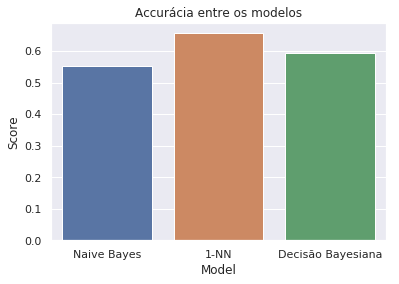

In [20]:
all_results = run_models(df.drop(columns="target"), df["target"])
no_processing_results = all_results.copy(deep=True)
sns.barplot(y="Score", x="Model", data=all_results)
plt.title("Accurácia entre os modelos");

In [21]:
all_results.head()

,Score,Model,Pré-Processamento
0,0.553188,Naive Bayes,Nada
1,0.656369,1-NN,Nada
2,0.593926,Decisão Bayesiana,Nada


Conforme podemos observar, o K-NN com o melhor K do último exercício (K=1) obteve o melhor resultado entre os 3 modelos e a Decisão Bayesiana foi um pouco melhor que o Naive Bayes.


- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Normalização e padronização

Verifique o efeito da normalização (atributos em [0,1]) e padronização (atributos com média 0 e variância 1) dos dados. Compare os casos sem processamento, com padronização e com normalização para os classificadores:

- knn(melhor k observado no item anterior)
- Naive Bayes
- Decisão Bayesiana

## Normalização

In [22]:
normalized_x = minmax_scale(df.drop(columns="target"))
all_results = all_results.append(run_models(normalized_x, df["target"], "Normalizado"), 
                                 ignore_index=True)

## Padronização

In [23]:
scaled_x = scale(df.drop(columns="target"))
all_results = all_results.append(run_models(scaled_x, df["target"], "Padronizado"),
                                 ignore_index=True)

## Comparação entre os 3

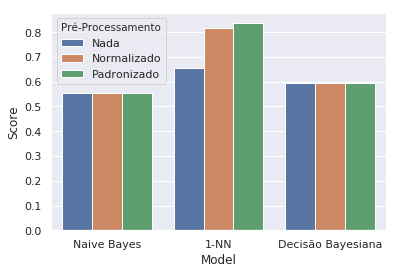

In [24]:
sns.barplot(data=all_results, y="Score", x="Model", hue="Pré-Processamento")

Conforme podemos observar, 1-NN melhorou siginificativamente seus resultados conforme a normalização/padronização dos dados, devido a ser sensível a escala das features considerando a métrica de distância que estamos usando. A padronização foi o que nos forneceu o melhor resultado.

Porém tanto o Naive Bayes como a Decisão Bayesiana não obtiveram uma mudança de resultado, como esperado, pois não são sensíveis a escala das features.

- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Correlação

Mostre a matriz de correlação entre os atributos. Considere os atributos com menor correlação (por exemplo, menor do que 0.5). Realize a classificação novamente apenas com esses atributos. A acurácia melhora?

Vamos plotar apenas o triângulo superior da matriz de correlação:

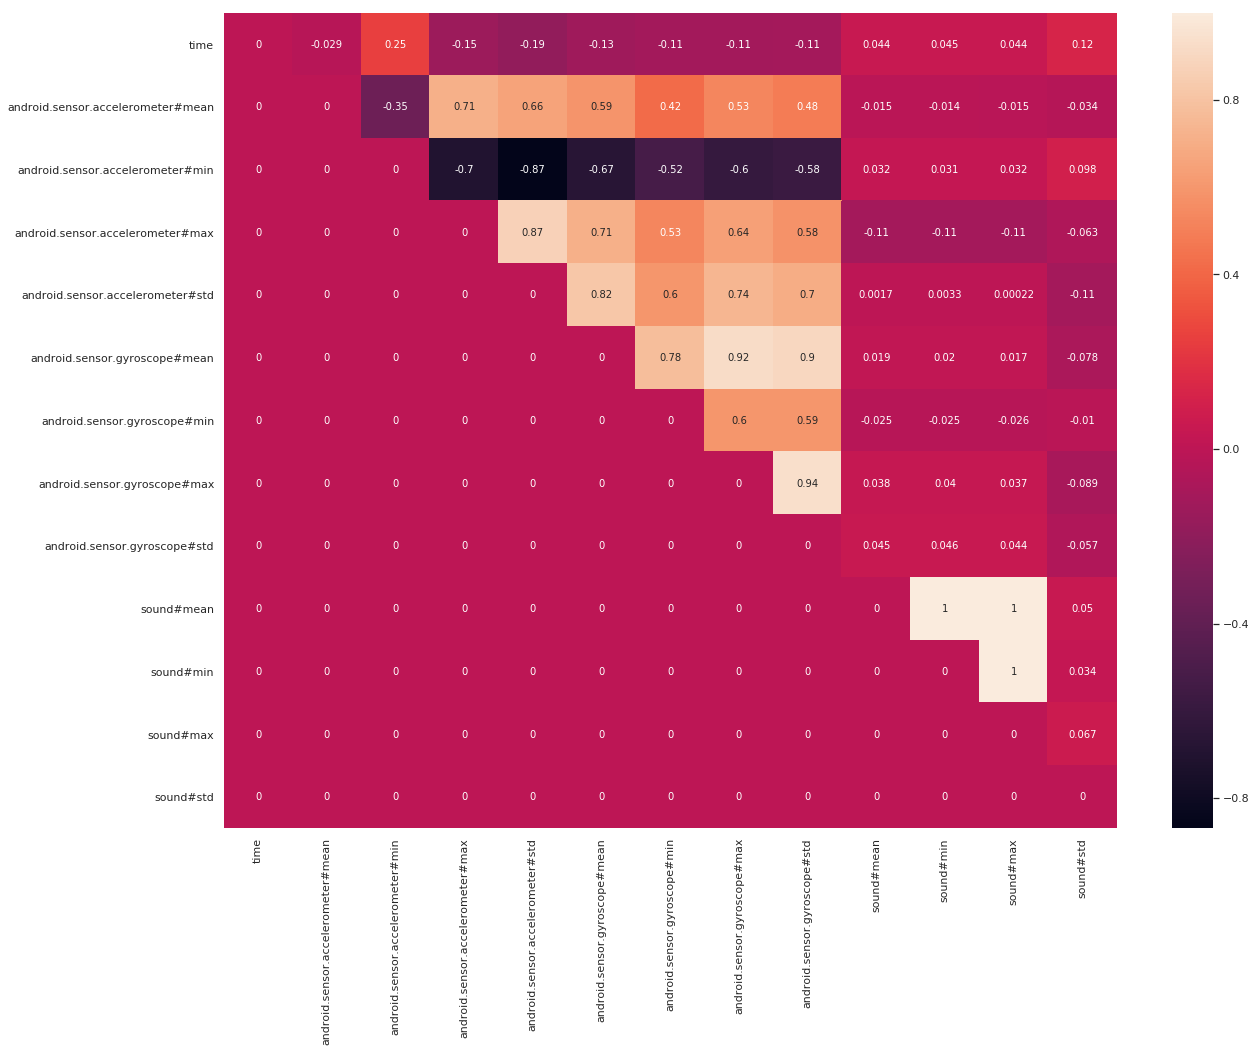

In [25]:
plt.figure(figsize=(20, 15))
cols_drop = ["target"]
corr_mat = df.drop(columns=cols_drop).corr()
xnames = corr_mat.columns.values

corr_mat = np.triu(corr_mat, k=1)
sns.heatmap(corr_mat, annot=True, xticklabels=xnames, yticklabels=xnames)

Percebemos que para ter uma correlação menor que 0.5 entre todas as variáveis restantes, devemos retirar:
- android.sensor.accelerometer#min
- android.sensor.accelerometer#max
- android.sensor.accelerometer#std
- android.sensor.gyroscope#mean
- android.sensor.gyroscope#min
- android.sensor.gyroscope#max
- sound#min
- sound#max

Vamos verificar:

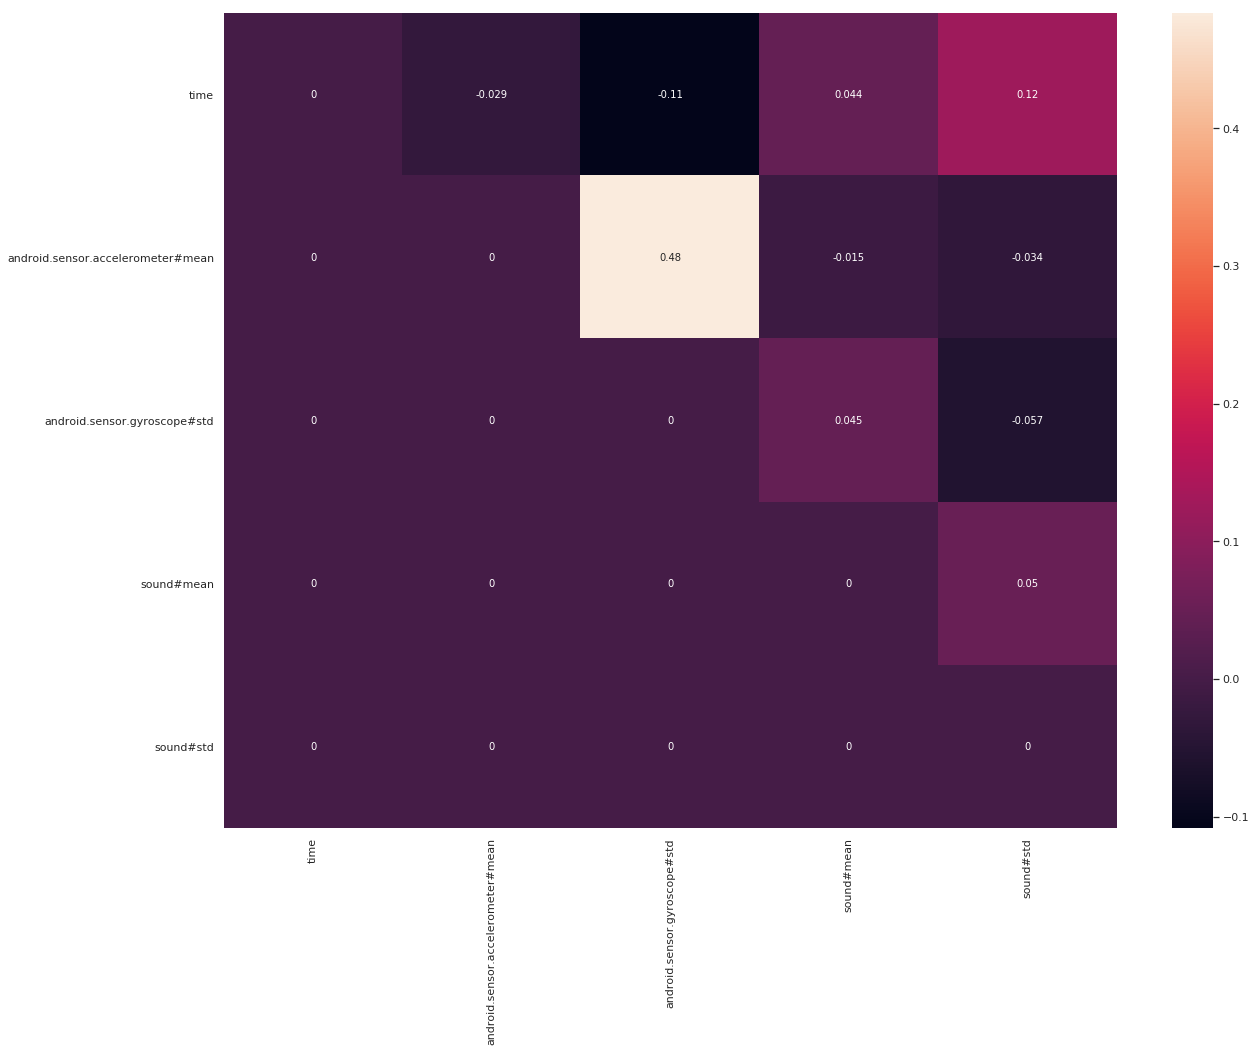

In [26]:
plt.figure(figsize=(20, 15))

cols_drop = [ 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max',
       'android.sensor.accelerometer#std', 'android.sensor.gyroscope#mean',
       'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max',
    'sound#min', 'sound#max', 'target']

corr_mat = df.drop(columns=cols_drop).corr()
xnames = corr_mat.columns.values

corr_mat = np.triu(corr_mat, k=1)
sns.heatmap(corr_mat, annot=True, xticklabels=xnames, yticklabels=xnames)

Vamos então retreinar o modelos com apenas essas colunas:

In [27]:
no_processing_results = no_processing_results.append(run_models(df.drop(columns=cols_drop), 
                                                                df["target"], 
                                                                "Feats com correlação < 0.5"),
                                 ignore_index=True)

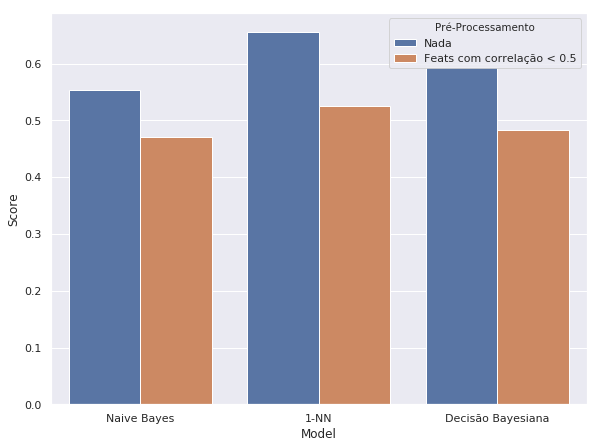

In [28]:
plt.figure(figsize=[9.6, 7.2])
sns.barplot(data=no_processing_results, y="Score", x="Model", hue="Pré-Processamento")

Conforme podemos observar, ao remover as features com correlação >= 0.5, temos uma queda na acurácia do modelo - isso porque uma correlação de 0.5 não é um valor alto o suficiente para afirmar que os dados são desnecessários, logo não deveríamos retirar eles do modelo pois contêm informação útil.
- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Ruídos

Verifique qual dos classificadores é mais robusto com relação à presença de ruídos. Para isso: 

- Aplique a normalização dos dados para que os atributos apresentem média igual a zero e variância igual a 1.

- Inclua em X% dos atributos, um valor normalmente distribuído com média zero e variância 1. Considere toda a matriz dos dados, sorteando uma posição da matriz de forma aleatória.

- Varie o nível de ruído, de 0 a 50% (em passos de 5%) e avalie como muda a classificação. Construa um gráfico de X%de ruídoversus porcentagem de classificação correta. Coloque a média e o desvio padrão calculados a partir de ao menos 10 simulações. Considere 70% dos dados no conjunto de treinamento.
- Discuta os resultados

In [29]:
%%time
scaled_x = scale(df.drop(columns="target"))
noises = [x/100  for x in range(0, 51, 5)]

df_cols = ["Score", "Model", "Ruido %"]
all_results = pd.DataFrame(columns=df_cols)

# Generate 70% of data for train
val_idx = np.random.choice([False, True], size=len(df), p=[0.7, 0.3])
repetitions = 10

for noise in noises: 
    for i in range(repetitions):
        new_scaled = scaled_x.copy()
        amount = int(len(df)*noise)

        # Find out witch rows and cols to index randomly
        rows = np.random.randint(0, high=df.shape[0], size=amount)
        cols = np.random.randint(0, high=df.shape[1]-1, size=amount)
        # Generate random noise
        noise_data = np.random.normal(loc=0, scale=1, size=amount)
        # add random noise to data
        new_scaled[rows, cols] = noise_data

        all_results = all_results.append(run_models(new_scaled, df["target"], 
                                                    f"{100*noise}%", val_idx=val_idx,
                                                   result_cols=df_cols),
                                         ignore_index=True, sort=False)

CPU times: user 10min 1s, sys: 9min 7s, total: 19min 8s
Wall time: 7min 4s


/home/bcoelho/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


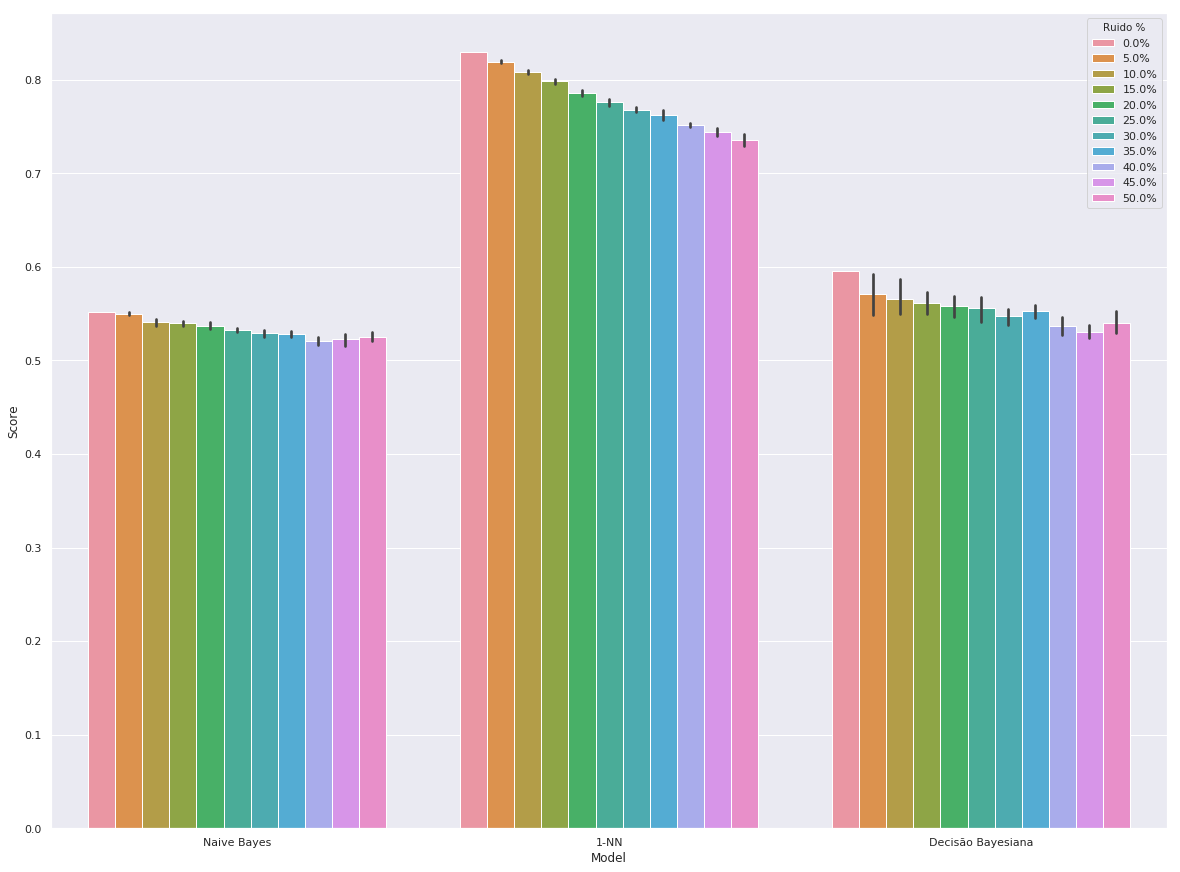

In [30]:
plt.figure(figsize=(20, 15))
sns.barplot(data=all_results, y="Score", x="Model", hue="Ruido %")

Como podemos observar, os 3 modelos parecem ser sensíveis ao ruído, todos tendo uma queda em acurácia conforme aumentamos o ruído.

Notamos que o 1-NN continua sendo o melhor modelo, porém parece ser também o mais sensível ao ruído. Caso houvesse ainda mias ruído, é possível que algum dos outros modelos tenha um resultado melhor que o 1-NN se ele manter o padrão.

Percemos que a Decisão Bayesiana foi o modelo cujos resultados mais variaram conforme as 10 simulações, indicado pela barra preta que mostra o desvio padrão das 10 simulações, para cada model e para cada porcentagem de ruído.


- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Naive Bayes

No caso do classificador Naive Bayes, é possível considerar diferentes funções para estimar as probabilidades. Compare os casos: (i) Gaussian Naive Bayes, (ii) multinomial Naive Bayese (iii)Bernoulli Naive Bayes. Considere os casos com e sem padronização.

In [31]:
models = [GaussianNB(), MultinomialNB(), BernoulliNB()]
names = ["Gaussian", "Multinomial", "Bernoulli"]

# Sem normalização
all_results = run_models(df.drop(columns="target"), df["target"], 
                         names=names, models=models)

# Com normalização
normalized_x = minmax_scale(df.drop(columns="target"))
all_results = all_results.append(run_models(normalized_x, df["target"], "Normalizado", 
                                             names=names, models=models), 
                                 ignore_index=True)

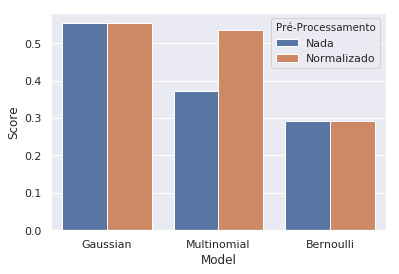

In [32]:
sns.barplot(data=all_results, y="Score", x="Model", hue="Pré-Processamento")

Como podemos observar, tanto o NB Gaussiano como o Bernoulli não foram afetados pela normalização dos dados;

Porém o Multinomial foi afetado e obteve sua melhor acurácia quando os dados estavam normalizados.


- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Parâmetros K-NN

No caso do Knn, compare as classificações usando diferentes métricas. Varie k e mostre as curvas (em um mesmo plot) para as distâncias euclidiana, Manhattan, Chebysheve e Minkowsky (p=1.5, p = 3).


In [33]:
%%time
df_cols = ["Score", "Métrica", "K"]
all_results = pd.DataFrame(columns=df_cols)
val_idx = np.random.choice([False, True], size=len(df), p=[0.7, 0.3])

metrics = ["euclidean", "manhattan", "chebyshev"] + ["minkowski"]*2
ks = [x for x in range(1, 14)]
power_param = [""]*3 + [1.5, 3]
names = [x+f" p={str(y)}" if y else x for x, y in zip(metrics, power_param)]

for k in ks:
    models = []
    for dist, p in zip(metrics, power_param):
        models.append(KNeighborsClassifier(n_neighbors=k, metric=dist, p=p))
    all_results = all_results.append(run_models(df.drop(columns="target"), df["target"], 
                                                names=names, models=models, 
                                                processing=str(k), result_cols=df_cols, 
                                                val_idx=val_idx),
                                     ignore_index=True)
                                     

CPU times: user 6.33 s, sys: 40.6 ms, total: 6.37 s
Wall time: 6.32 s


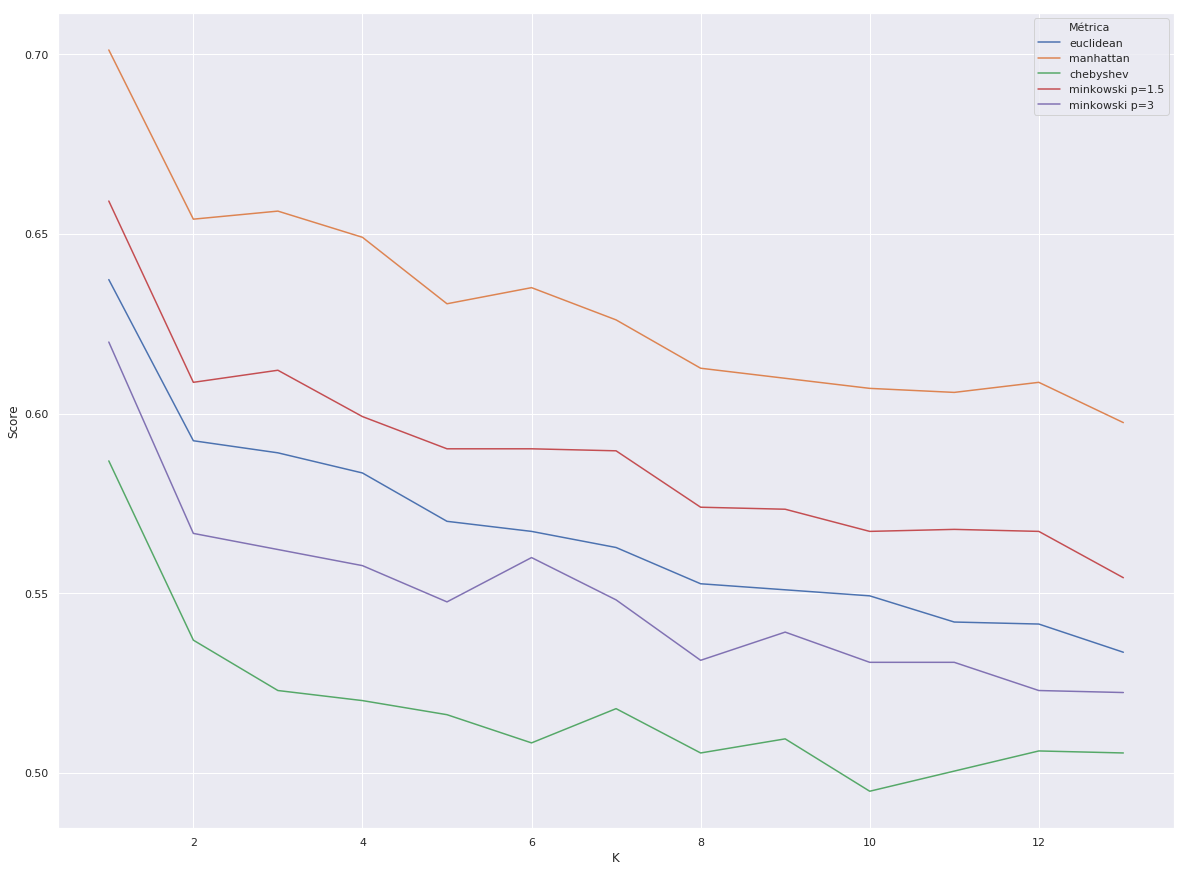

In [34]:
plt.figure(figsize=(20, 15))
all_results["K"] = all_results["K"].astype(int)
sns.lineplot(data=all_results, y="Score", x="K", hue="Métrica")

Conforme podemos observar, a distância Manhattan foi sempre a melhor métrica, considerando-se um mesmo K;

Percebemos que se tivessemos apenas utilizado a distância padrão (euclidiana) da biblioteca, teriamos uma acurácia 0.07 menor que com uma simples busca pela melhor métrica de distância.


Também percemos que me geral, K=1 é uma ótima escolha, independente da métrica utilizada, e conforme aumentamos o K, todas as métricas parecem diminuir seu resultado.

- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# Porcentagem de treino

Faça um gráfico da fração de elementos no conjunto de treinamento (10% até 90% em passos de 10%) versus acurácia para os classificadores:

- knn(melhor k observado anteriormente)
- Naive Bayes
- Decisão Bayesiana

Considere os casos com e sem padronização

In [35]:
%%time
df_cols = ["Score", "Model", "% do treino"]
all_results = pd.DataFrame(columns=df_cols)
val_idx = np.random.choice([False, True], size=len(df), p=[0.7, 0.3])

fractions = [x/10 for x in range(1, 11)]
scores = []
for frac in fractions:
    train_idx = pd.DataFrame(df[val_idx]).sample(frac=frac).index
    all_results = all_results.append(run_models(df.drop(columns="target"), df["target"], 
                                            processing=str(100*frac), result_cols=df_cols, 
                                            val_idx=val_idx, train_idx=train_idx),
                                 ignore_index=True)


CPU times: user 60 s, sys: 54.9 s, total: 1min 54s
Wall time: 42 s


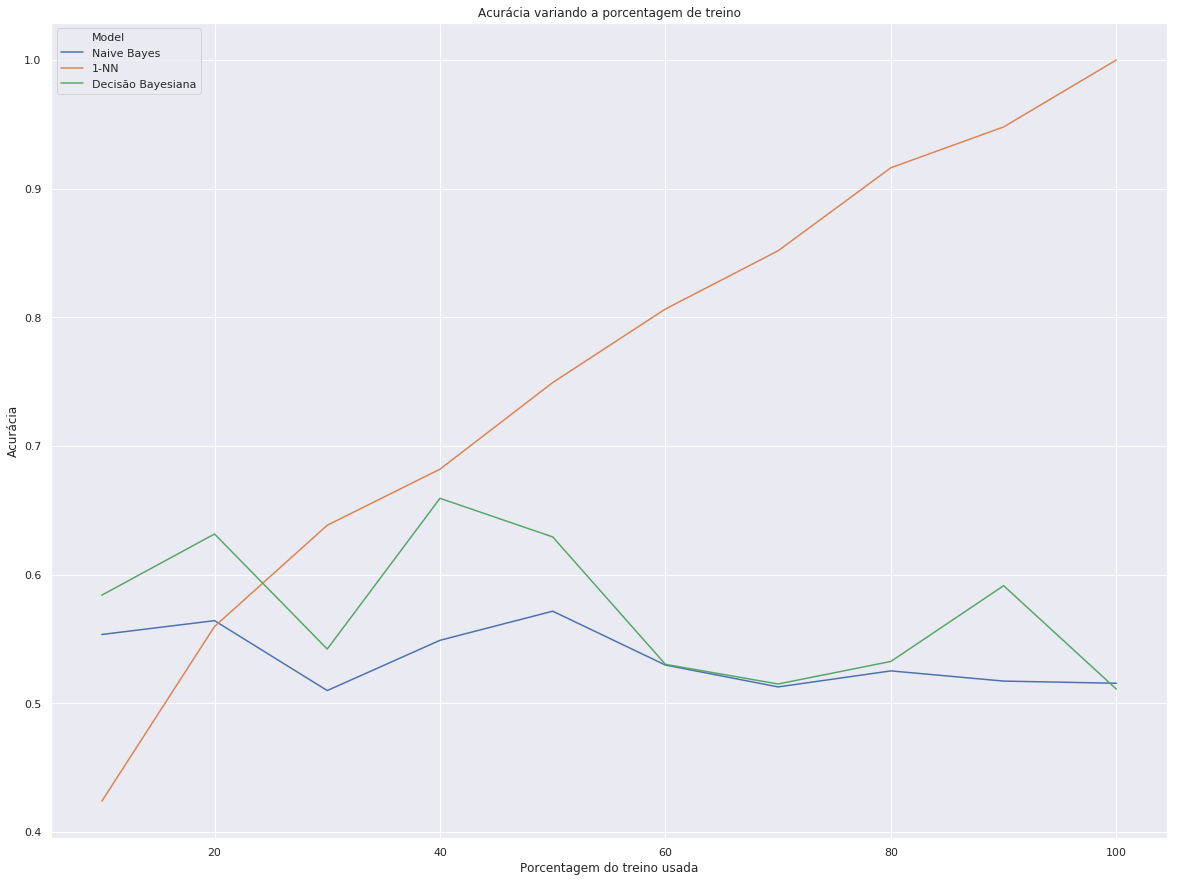

In [36]:
plt.figure(figsize=(20, 15))
all_results["% do treino"] = all_results["% do treino"].astype(float)
sns.lineplot(data=all_results, y="Score", x="% do treino", hue="Model")
plt.title("Acurácia variando a porcentagem de treino")
plt.xlabel("Porcentagem do treino usada");
plt.ylabel("Acurácia");

Conforme podemos observar, conforme aumentamos a quantidade de dados usados no treino, o 1-NN melhora seu resultado, devido a propriedade de ser um classificador "preguiçoso", altamente influenciado pela sua quantidade de exemplos.

Já para o Naive Bayes e a Decisão Bayesiana, podemos ver que a quantidade de dados no treino não tem tanto impacto.

- - - 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>